In [1]:
#import all the necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
# Loading the combined data file here.

dataset['Rating'] = dataset['Rating'].astype(float)

In [3]:
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [4]:
dataset.shape

(24058263, 2)

In [5]:
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [6]:
# Find how many people have rated the movies as 1*, 2*, 3*, 4* and 5*, in an overview.
p = dataset.groupby('Rating')['Rating'].agg(['count'])
p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [7]:
# To find the total count of movies, we can refer combined_data_1 file. Here all the movies ids are marked as 1:, 2:,3:..and so on
# When we create a data table out of it, one row will be 1: with rating = NaN. Similarly for all the other Movie_Ids, Rating = NaN.
# We can find to count of moves by counting the number of NaNs present in Ratings column, as each of it corresponds to each movie id.
movie_count = dataset.isnull().sum()[1]
movie_count

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1196\3167935213.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = dataset.isnull().sum()[1]


4499

In [8]:
# Printing the total number of customers present in the entire data.
cust_count = dataset['Cust_Id'].nunique()-movie_count
cust_count

470758

In [9]:
# Printing total number ratings given by the customer.
rating_count = dataset['Cust_Id'].count() - movie_count
rating_count

24053764

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1196\687546088.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')


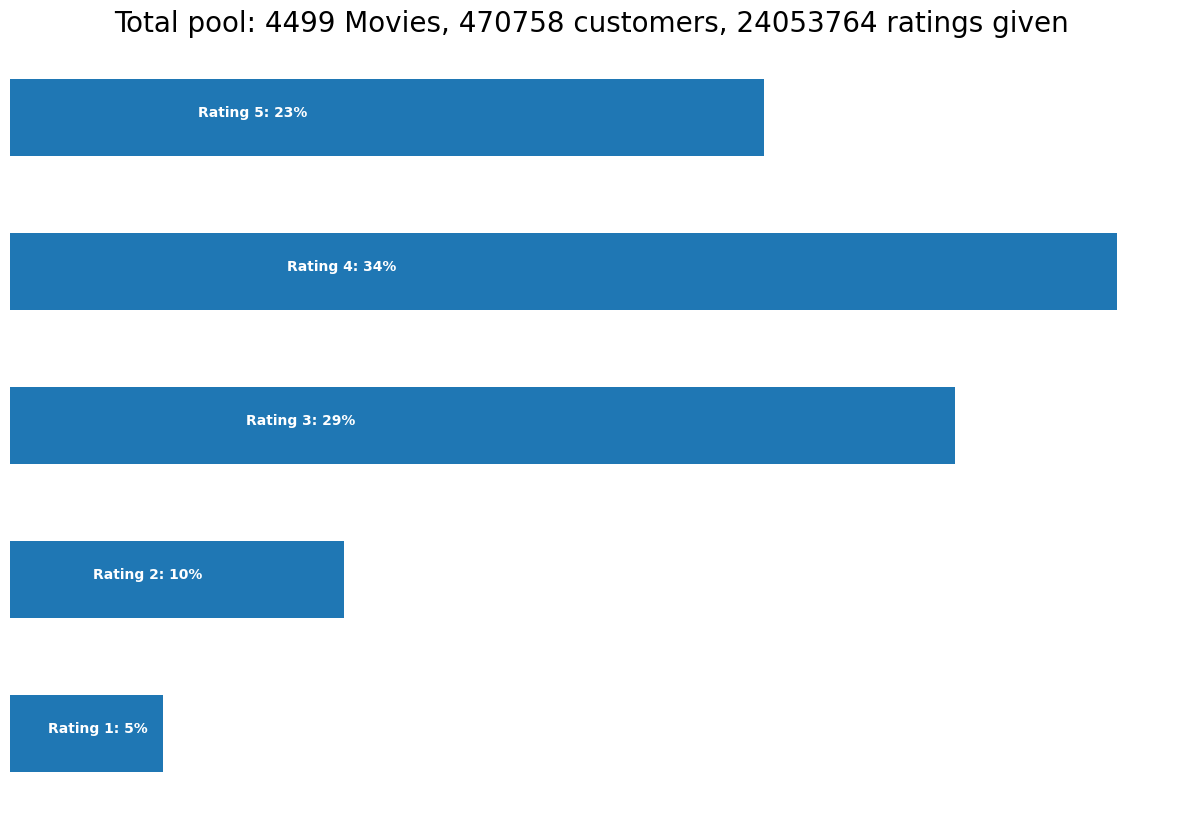

In [10]:
# plotting a bar graph for the count obtained for each stars.
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

In [11]:
# Create a new column in the data table called movie_id, and allocate these movie_ids to all the corresponding rating and cust_id.
# For that we first calculate how many null values we have in the Ratings column and export it to the dataframe df
df_nan = pd.DataFrame(pd.isnull(dataset.Rating), )
df_nan.head()
# Here, for index=0, the isnull() is True for Rating column because, 1: has NaN at the first row. The rest are all False untill 2: were it will be True again.

,Rating
0,True
1,False
2,False
3,False
4,False


In [12]:
# It is at all those True values, we have our movie ids which we need to further export to another column.
df_nan = df_nan[df_nan['Rating'] == True]
df_nan.shape

(4499, 1)

In [13]:
df_nan = df_nan.reset_index()
df_nan.head()
# df_nan is the new dataframe created which shows the movie ids, and the boolean values for its corresponding Ratings (which ideally will be True for all of them (ie.. isnull()=True))

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [14]:
# Creating numpy arrays that has movie_id as 1 from 0 to 547, 2 from 548 to 693 and so on. For that we use for loop.
movie_np = []    #creating an empty array to which all the details on df_nan and data will be combined and stored.
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
# if you type x = zip(df_nan['index'][1:],df_nan['index'][:-1]), and tuple(x), you will get a tuple where all the movie ids are grouped together.
    temp = np.full((1,i-j-1), movie_id)
     # i-j-1 = 548-0-1 = 547. Means for 547 records movie_id (since it was initiated as 1), will be 1.
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# NOTE: In the above command, zip(df_nan['index'][1:],df_nan['index'][:-1]), it will start at 1 but eventhough end value is given as index = -1, that value will not be considered.
# Hence, for the last index, we will have to manually set the movie_id all by ourselves
# Below command is the account for last record and its corresponding length
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)
# the last record value will be stored in movie_np.

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [15]:
# Appending the above created array to the datset after removing the 'NaN' rows
dataset = dataset[pd.notnull(dataset['Rating'])]

dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [16]:
dataset.shape

(24053764, 3)

In [17]:
f = ['count','mean']

In [18]:
# Lets view the count and mean values of Rating column alone and not Cust_Id from data table.
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

# Store the index of the data table (Movie_Id) to another variable, with an integer datatype.
dataset_movie_summary.index = dataset_movie_summary.index.map(int)

# Creating a benchmark for filtering the data. Here, we will be creating a list of all the movies rated less often(only include top 30% rated movies).
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

# We are creating a new varialble, drop_movie_list wherein we save the index values of all the movie ids which falls below the benchmark value.
# We will be eliminating all the index values of drop_movie_list from data table.
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [19]:
# Just like we eliminated bottom values from the count section, we will try o eliminate the inactive customers (users who rate less often).
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')
# customer benchmark will be 52.0

Customer minimum times of review: 52.0


In [20]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (24053764, 3)


In [21]:
# Now we will delete the data of drop_cust_list and drop_movie_ist from from our original data table.
# In the below query, isin() will calculate whatever values are present inside the drop_movie_list and drop_cust_list, compare all those values w.r.t data table ofor movie_id and cust_id repsectively.
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
# '~' is used to eleiminate all the values of the dop lists from data table.

print('After Trim Shape: {}'.format(dataset.shape))
# After the eleimination, the number of rows will be reduced to 17337458, as shown in the below command.

After Trim Shape: (17337458, 3)


In [22]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [23]:
# Now we will prepare the dataset for SVD algorithm (Singular Value Decomposition). This algorithm will help decomposing the data (ie.. eliminating unnessecary feautures from the data set).
# The data that we input into the SVD algorith will be in the form of a sparse matrix (we cannot input dataframe into SVD algorithm).
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 1350)


In [24]:
df_p.head()

Movie_Id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Now we will load movie_titles.csv into Jupyter.
df_title = pd.read_csv(
    'Copy of movie_titles.csv',
    encoding="ISO-8859-1",
    header=None,
    names=['Movie_Id', 'Year', 'Name'],
    on_bad_lines='skip'  # Skips lines with too many fields
)

# Here, we use encoding = "ISO-8859-1", because in the movie_titles.csv, there are some movie names which are in symbolic forms as well. In order to import those symbols as well, we use this command.

# Setting the movie_id (present in the movie_titles.csv as index to the dataframe)
df_title.set_index('Movie_Id', inplace=True)

In [26]:
print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


In [27]:
# Now we will print our SVD algorithm.
# Import required librariesimport math
import re
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [28]:
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE(root mean square error), and MAE(mean absolute error) of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)
# Here, the 100000 row dataset will be divided into 3 parts, from where, in the first fold, it will take the first sub-data as pour testing data. And 2nd and 3rd folds will become training data.
# So in fold 1, it will train the first 1st on top of the 2nd and 3rd part of the 100k data. And the 2nd and 3rd part will test the model on the 1st subset of the data.
# Similarly in fold 2, it will train the 2nd model on top of the 1st and 3rd part of the 100k data. And the 1st and 3rd part will test the model on the 2nd subset of the data.
# Similarly in 3rd fold.

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9993  0.9986  0.9957  0.9978  0.0015  
MAE (testset)     0.7988  0.7963  0.7882  0.7944  0.0045  
Fit time          1.85    1.61    1.67    1.71    0.10    
Test time         0.59    0.28    0.47    0.45    0.13    


{'test_rmse': array([0.99927017, 0.99855789, 0.99569663]),
 'test_mae': array([0.79884544, 0.79626647, 0.78819862]),
 'fit_time': (1.846726894378662, 1.613203525543213, 1.6730289459228516),
 'test_time': (0.5920259952545166, 0.2811915874481201, 0.4675147533416748)}

In [29]:
dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [30]:
# Now we first take user 712664, and try to recommend some movies based on the past data.

# first we will fetch the details on how many movies that person has rated the movie as 5 stars.
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
# setting the index value as Movie_Id for the dataset.
dataset_712664 = dataset_712664.set_index('Movie_Id')
# in the original dataset, we dont have the name of the movie. Hence we join movie_list table and dataset to extract the movie name corresponding to each movie_id.
dataset_712664 = dataset_712664.join(df_title)['Name']    #you only want to see the name. Which is why u only mention Name column here.
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

In [ ]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
# considering the movies which are not in the drop movies list.
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
# reading the dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))